Random forest is a supervised ML algo which is based on ensemble learning.                         
The expected accuracy increases with the increase in no.of decision trees.

Random Forest has two variations: one for classification and one for regression             
It creates decision trees on the given data samples and gets prediction from each tree and selects the best solution by means of voting.                   


![random forest pic](https://anasbrital98.github.io/assets/img/20/random-forest.jpg)

**Working of RFA**   
**1st stage**
1. We randomly select 'k' features out of total 'm' features where k<m
2. Among the k features calculate the node d using best split point
3. Split the node into daughter nodes using best split
4. Repeat 1 to 3 steps until 1 number of nodes has bee reached.
5. Build forest by repeating steps 1 to 4 for n number of times to create n number of trees

**In the 2nd stage, we make predictions using the trained random forest algorithm**
1. We take the test features and use the rules of each randomly created decision tree to predict the outcome and stores the predicted outcome
2. Then, we calculate the votes for each predicted target
3. Finally, we consider the high voted predicted target as the final prediction from the random forest algorithm

The advantages of Random forest algorithm are as follows:-
1. Random forest algorithm can be used to solve both classification and regression problems.
2. It is considered as very accurate and robust model because it uses large number of decision-trees to make predictions.
3. Random forests takes the average of all the predictions made by the decision-trees, which cancels out the biases. So, it does not suffer from the overfitting problem.
4. Random forest classifier can handle the missing values. There are two ways to handle the missing values. First is to use median values to replace continuous variables and second is to compute the proximity-weighted average of missing values.
5. Random forest classifier can be used for feature selection. It means selecting the most important features out of the available features from the training dataset.
   
The disadvantages of Random Forest algorithm are listed below:-
1. The biggest disadvantage of random forests is its computational complexity. Random forests is very slow in making predictions because large number of decision trees are used to make predictions. All the trees in the forest have to make a prediction for the same input and then perform voting on it. So, it is a time-consuming process.

**Feature Selection with Random Forests**
- Random forests algorithm can be used for feature selection process. This algorithm can be used to rank the importance of variables in a regression or classification problem

- We measure the variable importance in a dataset by fitting the random forest algorithm to the data.

- The importance of the j-th feature was measured after training. The values of the j-th feature were permuted among the training data and the out-of-bag error was again computed on this perturbed dataset. The importance score for the j-th feature is computed by averaging the difference in out-of-bag error before and after the permutation over all trees. The score is normalized by the standard deviation of these differences.

- Features which produce large values for this score are ranked as more important than features which produce small values. Based on this score, we will choose the most important features and drop the least important ones for model building.

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv(r"C:\Users\PHANEENDRA\Downloads\Cranes ML\car.data",header=None,names=['buying','maintenance','doors','persons','lug_boot','saftey','label'])
df

,buying,maintenance,doors,persons,lug_boot,saftey,label
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   saftey       1728 non-null   object
 6   label        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [12]:
for i in df.columns:
    print(f"{i}, {df[i].unique()}")

buying, ['vhigh' 'high' 'med' 'low']
maintenance, ['vhigh' 'high' 'med' 'low']
doors, ['2' '3' '4' '5more']
persons, ['2' '4' 'more']
lug_boot, ['small' 'med' 'big']
saftey, ['low' 'med' 'high']
label, ['unacc' 'acc' 'vgood' 'good']


In [13]:
df['doors']=df['doors'].replace('5more','5')

In [14]:
df['persons']=df['persons'].replace('more','5')

In [15]:
# df['doors']=df['doors'].astype(int)

In [16]:
# df['persons']=df['persons'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintenance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   saftey       1728 non-null   object
 6   label        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [18]:
x=df.drop(columns='label')
y=df['label']

In [19]:
x

,buying,maintenance,doors,persons,lug_boot,saftey
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5,5,med,med
1724,low,low,5,5,med,high
1725,low,low,5,5,big,low
1726,low,low,5,5,big,med


In [20]:
# cat_data=[]
# num_cols=[]
# for i in x.columns:
#     if x[i].dtype=='object':
#         cat_data.append(i)
#     else:
#         num_cols.append(i)

# num_cols

In [21]:
import category_encoders as ce

In [22]:
# encoder=ce.OneHotEncoder(cols=cat_data)
# x=encoder.fit_transform(x)
# x.head()

In [23]:
encoder=ce.OrdinalEncoder(cols=x.columns)
x=encoder.fit_transform(x)
x

,buying,maintenance,doors,persons,lug_boot,saftey
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2
...,...,...,...,...,...,...
1723,4,4,4,3,2,2
1724,4,4,4,3,2,3
1725,4,4,4,3,3,1
1726,4,4,4,3,3,2


In [24]:
#Scaling the input feature data

# from sklearn.preprocessing import MinMaxScaler
# scaler=MinMaxScaler()
# x_scaled=scaler.fit_transform(x)
# x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
# x_scaled

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [79]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000)

In [81]:
model.score(x_test,y_test)

0.976878612716763

In [75]:
model3=RandomForestClassifier(n_estimators=100)
model3.fit(x_train,y_train)

RandomForestClassifier()

In [77]:
model3.score(x_test,y_test)

0.9739884393063584

In [28]:
y_pred=model.predict(x_test)

In [29]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix

In [30]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 76,   2,   0,   1],
       [  0,  14,   0,   3],
       [  2,   0, 238,   0],
       [  1,   0,   0,   9]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.96      0.96      0.96        79
        good       0.88      0.82      0.85        17
       unacc       1.00      0.99      1.00       240
       vgood       0.69      0.90      0.78        10

    accuracy                           0.97       346
   macro avg       0.88      0.92      0.90       346
weighted avg       0.98      0.97      0.97       346



In [32]:
model.feature_importances_

array([0.148393  , 0.14365878, 0.0590058 , 0.25108043, 0.09170574,
       0.30615625])

In [33]:
feature_scores=pd.Series(model.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_scores

saftey         0.306156
persons        0.251080
buying         0.148393
maintenance    0.143659
lug_boot       0.091706
doors          0.059006
dtype: float64

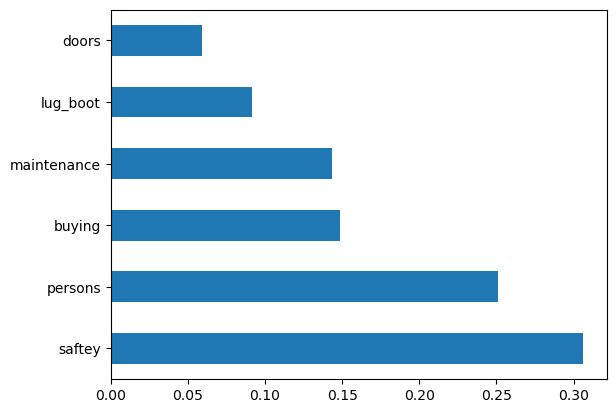

In [34]:
import matplotlib.pyplot as plt
feature_scores.plot(kind='barh')
plt.show()

Here according to the process i've usd I am getting 'persons' as the most important feature and 'lug_boot2' as least important feature

In [36]:
x1=x.drop(columns=['doors'])
x1

,buying,maintenance,persons,lug_boot,saftey
0,1,1,1,1,1
1,1,1,1,1,2
2,1,1,1,1,3
3,1,1,1,2,1
4,1,1,1,2,2
...,...,...,...,...,...
1723,4,4,3,2,2
1724,4,4,3,2,3
1725,4,4,3,3,1
1726,4,4,3,3,2


In [37]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y,test_size=0.2,random_state=1)

In [83]:
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier(n_estimators=1000)
model1.fit(x_train1,y_train1)

RandomForestClassifier(n_estimators=1000)

In [85]:
model1.score(x_test1,y_test1)

0.9335260115606936

In [87]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100)
model2.fit(x_train1,y_train1)

RandomForestClassifier()

In [89]:
model2.score(x_test1,y_test1)

0.9335260115606936

**Results and conclusion**
1. Here first without dropping any columns and with the no.of decision trees as 1000, I got an accuracy of 97.68%.
2. with n_estimators as 100, i got an accuracy of 97.39, which indicates that increase in no.of decision trees results in increase in accuracy. 
3. After assessing the feature scores, it is clear that 'saftey' is the most important feature and 'doors' is the least important feature.
4. So, i retrained the model again dropping the 'doors' column, but the accuracy is decreased this time that is 92.7%, with n_eastimators as 100 and 10000. So I will not drop this feature.
5. I've also done the analysis using classification report and confusion matrix.